# Convolutional Neural Network to determine wheather the picture is of a dog or a cat.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Model
import pickle
import os

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

cheking versions of libraries imported above


In [3]:
np.__version__

'1.19.5'

In [4]:
print(pickle.format_version)

4.0


In [5]:
pd.__version__

'1.0.5'

In [6]:
print(tf.__version__)

2.5.0


**Part 1 - Data Preprocessing**

In [7]:
#Preprocessing the Training set
#Here size of image is reduced to 64x64, batch of images is kept as 32 and class is defined as 'binary'.
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory("D:\\WORK\\Projects\\DeepLearningProjects\\DeepLearning\\CatvsDog\\training_set\\training_set", target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [8]:
#Preprocessing the Test set
#Applying same scale as training set, but only feature scaling is applied. image augmentation is avoided to prevent leakage of testing data.
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("D:\\WORK\\Projects\\DeepLearningProjects\\DeepLearning\\CatvsDog\\test_set\\test_set", target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 2023 images belonging to 2 classes.


In [9]:
Cats = len(os.listdir("D:\\WORK\\Projects\\DeepLearningProjects\\DeepLearning\\CatvsDog\\training_set\\training_set\\cats"))

In [10]:
Dogs = len(os.listdir("D:\\WORK\\Projects\\DeepLearningProjects\\DeepLearning\\CatvsDog\\training_set\\training_set\\dogs"))

In [11]:
Cats

4001

In [12]:
Dogs

4006

In [13]:
placed_no = [Cats,Dogs]

In [14]:
stat = ['Cats', 'Dogs']

In [15]:
colors = ['blue' , 'yellow']

([<matplotlib.patches.Wedge at 0x1d8c5633850>,
 [Text(0.0010790201141980987, 1.0999994707796878, 'Cats'),
  Text(-0.0010791231035818835, -1.0999994706786578, 'Dogs')],
 [Text(0.0005885564259262356, 0.5999997113343751, '50.0%'),
  Text(-0.0005886126019537545, -0.5999997112792679, '50.0%')])

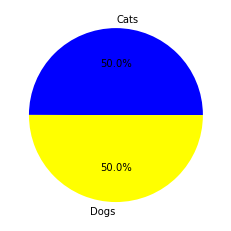

In [16]:
plt.pie(placed_no , labels = stat , colors=colors , autopct= '%0.1f%%')

**Part 2 - Building the CNN**

In [17]:
#Initialising the CNN
model = tf.keras.models.Sequential()

It is done in 5 steps:

1. Convolution
2. Polling
3. Flattening
4. Full Connection
5. Output Layer

In [18]:
#STEP 1: ADDING CONVOLUTIONAL LAYER
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#Note that in image augmentation we kept the image size as 64x64, therefore input_shape should also be same [64,64,3] (here 3 signifies that this is a colorful image (R,G,B))
#Activation function relu is applied to decrease any linearity that might have arrised while applying filters.

In [19]:
#STEP 2: APPLYING MAX POLLING
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))



In [20]:
#Adding 2nd Convolutional layer
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [21]:
#STEP 3: FLATTENING
model.add(tf.keras.layers.Flatten())

In [22]:
#STEP 4: FULL CONNECTION
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [23]:
#STEP 5: OUTPUT LAYER
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Part 3 - Training the CNN**

In [24]:
#Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
#Training the CNN on the Training set and evaluating it on the Test set
history = model.fit(x = training_set, validation_data = test_set, epochs =5 )

Epoch 1/5
251/251 [==============================] - 193s 762ms/step - loss: 0.6767 - accuracy: 0.5710 - val_loss: 0.6337 - val_accuracy: 0.6614
Epoch 2/5
251/251 [==============================] - 58s 229ms/step - loss: 0.6124 - accuracy: 0.6683 - val_loss: 0.6668 - val_accuracy: 0.6184
Epoch 3/5
251/251 [==============================] - 57s 226ms/step - loss: 0.5726 - accuracy: 0.7036 - val_loss: 0.5489 - val_accuracy: 0.7252
Epoch 4/5
251/251 [==============================] - 57s 227ms/step - loss: 0.5471 - accuracy: 0.7227 - val_loss: 0.5258 - val_accuracy: 0.7420
Epoch 5/5
251/251 [==============================] - 58s 233ms/step - loss: 0.5117 - accuracy: 0.7482 - val_loss: 0.5071 - val_accuracy: 0.7647


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

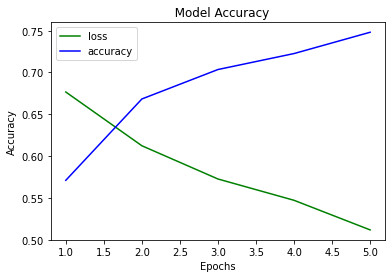

In [27]:
loss_train = history.history['loss']
loss_val = history.history['accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='loss')
plt.plot(epochs, loss_val, 'b', label='accuracy')
plt.title('  Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


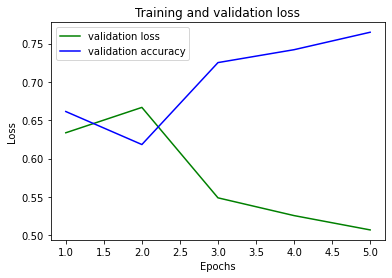

In [28]:
loss_train = history.history['val_loss']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='validation loss')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Part 4 - Making a single prediction**

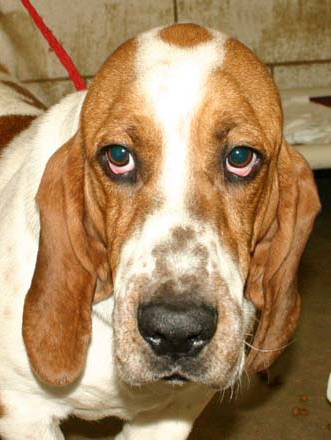

In [29]:
from keras.preprocessing import image
image.load_img("D:\\WORK\\Projects\\DeepLearningProjects\\DeepLearning\\CatvsDog\\test_set\\test_set\\dogs\\dog.4224.jpg")

In [31]:
from keras.preprocessing import image
test_image = image.load_img("D:\\WORK\\Projects\\DeepLearningProjects\\DeepLearning\\CatvsDog\\test_set\\test_set\\dogs\\dog.4224.jpg", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [32]:
print(prediction)

dog
